<a href="https://colab.research.google.com/github/escorpio11/programa-python/blob/main/UNI/VISUALIZACION_DE_DATOS/M%C3%93DULO_6_Matplotlib_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

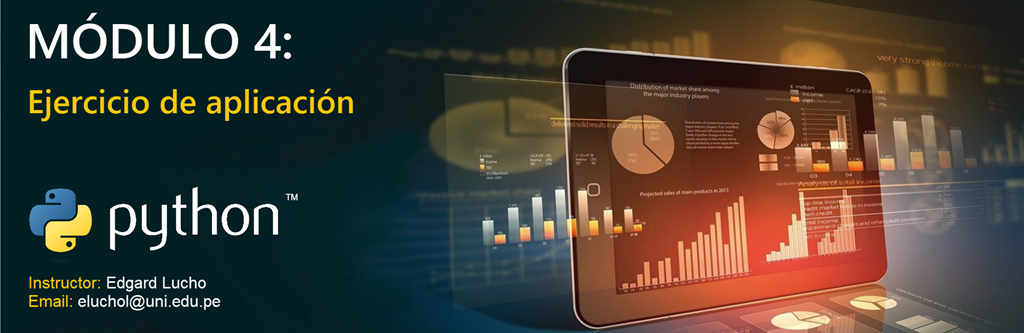

<table border=1 width='99%'>
<tr>
<td bgcolor='#008000'>

# **<font color="#FFC901"> Módulo 6: geopandas</font>**

</td>
</tr>
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_excel('drive/MyDrive/db/sismos.xlsx')
df.drop(columns='hora UTC', inplace=True)
df.columns=['Fecha', 'Latitud', 'Longitud', 'Profundidad', 'Magnitud']
df['Fecha'] = pd.to_datetime(df['Fecha'])

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> ¿Qué es GeoPandas?</font>**

</td>
</tr>
</table>

**GeoPandas** es una biblioteca de Python que extiende las capacidades de pandas para trabajar con datos geoespaciales. Proporciona estructuras de datos y herramientas para manipular datos geográficos, como puntos, líneas, polígonos y otras geometrías, permitiendo realizar análisis espaciales de manera eficiente.

En esencia, **GeoPandas** combina la flexibilidad de **pandas** (que maneja datos tabulares) con la potencia de **shapely** (para geometrías) y **fiona** (para leer/escribir archivos geoespaciales). Además, se integra con otras bibliotecas geoespaciales como **pyproj** (proyecciones) y **matplotlib** (visualización).

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> Características</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Estructura de datos geoespaciales:</font>**

</td>
</tr>
</table>

>* **GeoDataFrame**: Es el núcleo de GeoPandas. Es una extensión de un pandas.DataFrame que incluye una columna especial llamada geometry, donde se almacenan las geometrías (puntos, líneas, polígonos, etc.).
>* **GeoSeries**: Una serie que contiene geometrías individuales.

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Operaciones espaciales:</font>**

</td>
</tr>
</table>

>* Realiza operaciones comunes en análisis geoespacial, como:
  * Unión espacial.
  * Intersección.
  * Buffer.
  * Cálculo de distancias.
  * Agregación espacial.

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Compatibilidad con formatos geoespaciales:</font>**

</td>
</tr>
</table>

>* Lee y escribe archivos en formatos estándar como:
  * Shapefiles (.shp).
  * GeoJSON (.geojson).
  * Archivos KML.
  * Otros formatos compatibles con GDAL/OGR.

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Visualización:</font>**

</td>
</tr>
</table>

>* Permite crear mapas rápidamente utilizando matplotlib.
>* Facilita la representación de datos geoespaciales con colores, etiquetas y otros elementos gráficos.

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Proyecciones:</font>**

</td>
</tr>
</table>

>* Trabaja con sistemas de coordenadas y proyecciones geográficas mediante la biblioteca **pyproj**.
>* Permite transformar datos entre diferentes sistemas de referencia espacial (CRS).

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> GeoSeries</font>**

</td>
</tr>
</table>

**GeoSeries** es una extensión de pandas.Series, diseñada para contener geometrías. Cada elemento de una GeoSeries es un objeto geométrico, como un punto, línea o polígono.

Se utiliza para almacenar y manipular datos geométricos de forma eficiente. Puedes realizar operaciones como la unión, intersección y cálculo de áreas sobre los objetos geométricos.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> GeoDataFrame</font>**

</td>
</tr>
</table>

**GeoDataFrame** es una extensión de pandas.DataFrame que permite almacenar datos tabulares, donde al menos una columna contiene geometrías (a menudo como GeoSeries).

Ideal para manejar conjuntos de datos geoespaciales, ya que permite combinar atributos tabulares y geometrías. Puedes realizar análisis espaciales, visualizaciones y manipulación de datos.

Un **GeoDataFrame** es una combinación de las **Series** de **Pandas**, con datos tradicionales (númericos, lógicos, cadenas, etc.) y las **GeoSeries** de GeoPandas, con geometrías (puntos, líneas, polígonos, etc.)

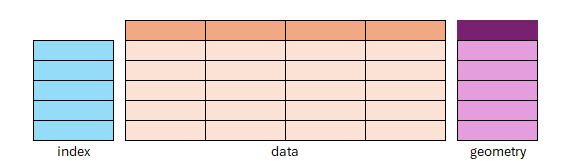

El término **CRS** se refiere a "Coordinate Reference System" (Sistema de Referencia de Coordenadas). En el ámbito de los datos geoespaciales, un CRS es un sistema que define cómo se representan las coordenadas en la superficie de la Tierra.

In [ ]:
df.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud
0,1960-01-13,-16.145,-72.144,60,7.5
1,1960-01-15,-15.000,-75.000,70,7.0
2,1960-01-17,-14.500,-74.500,150,6.4
3,1960-01-23,-12.500,-68.500,300,5.8
4,1960-01-30,-5.500,-77.500,100,5.7


In [ ]:
df['geometry'] = gpd.points_from_xy(df.Longitud, df.Latitud)
df.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud,geometry
0,1960-01-13,-16.145,-72.144,60,7.5,POINT (-72.144 -16.145)
1,1960-01-15,-15.000,-75.000,70,7.0,POINT (-75 -15)
2,1960-01-17,-14.500,-74.500,150,6.4,POINT (-74.5 -14.5)
3,1960-01-23,-12.500,-68.500,300,5.8,POINT (-68.5 -12.5)
4,1960-01-30,-5.500,-77.500,100,5.7,POINT (-77.5 -5.5)


<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Transformar de DataFrame a GeoDataFrame</font>**

</td>
</tr>
</table>

In [ ]:
gdf_sismos = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326').copy()
gdf_sismos.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud,geometry
0,1960-01-13,-16.145,-72.144,60,7.5,POINT (-72.144 -16.145)
1,1960-01-15,-15.000,-75.000,70,7.0,POINT (-75 -15)
2,1960-01-17,-14.500,-74.500,150,6.4,POINT (-74.5 -14.5)
3,1960-01-23,-12.500,-68.500,300,5.8,POINT (-68.5 -12.5)
4,1960-01-30,-5.500,-77.500,100,5.7,POINT (-77.5 -5.5)


<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Magnitud >= 5</font>**

</td>
</tr>
</table>

In [ ]:
gdf_sismos_5 = gdf_sismos[gdf_sismos['Magnitud'] >= 5].copy()
gdf_sismos_5.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud,geometry
0,1960-01-13,-16.145,-72.144,60,7.5,POINT (-72.144 -16.145)
1,1960-01-15,-15.000,-75.000,70,7.0,POINT (-75 -15)
2,1960-01-17,-14.500,-74.500,150,6.4,POINT (-74.5 -14.5)
3,1960-01-23,-12.500,-68.500,300,5.8,POINT (-68.5 -12.5)
4,1960-01-30,-5.500,-77.500,100,5.7,POINT (-77.5 -5.5)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
gdf = gpd.read_file('drive/MyDrive/db/countries')
gdf.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,43053054.0,Africa,Algeria,DZA,171091.0,"POLYGON ((8.57656 36.93721, 8.59766 36.88389, ..."
1,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((13.07275 -4.63477, 13.05732 -4..."
2,11801151.0,Africa,Benin,BEN,14390.0,"POLYGON ((1.62266 6.2168, 1.61094 6.25083, 1.7..."
3,2303697.0,Africa,Botswana,BWA,18340.0,"POLYGON ((25.25879 -17.79355, 25.23906 -17.843..."
4,20321378.0,Africa,Burkina Faso,BFA,15990.0,"POLYGON ((0.90049 10.99326, 0.64297 10.98306, ..."


<Axes: >

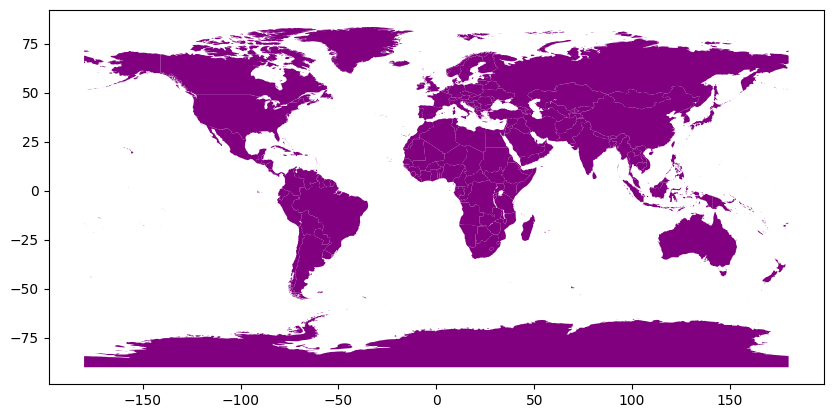

In [ ]:
gdf.plot(figsize=(10,10), color='purple')

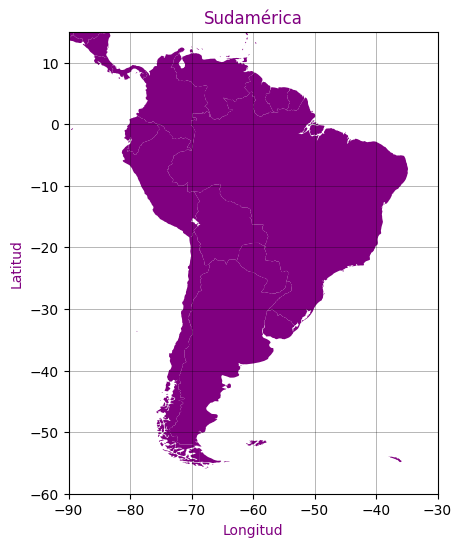

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
gdf.plot(ax=ax, color='purple')

ax.set_xlim(-90, -30)
ax.set_ylim(-60, 15)

ax.set_title('Sudamérica', color='purple')
ax.set_xlabel('Longitud', color='purple')
ax.set_ylabel('Latitud', color='purple')

ax.grid(True, color='black', alpha=0.4, lw=0.5)

plt.show()

In [ ]:
gdf_sudamerica = gdf[gdf['continent'] == 'South America'].copy()
gdf_sudamerica.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
229,44938712.0,South America,Argentina,ARG,445445.0,"MULTIPOLYGON (((-57.60889 -30.18779, -57.64575..."
230,11513100.0,South America,Bolivia,BOL,40895.0,"MULTIPOLYGON (((-69.51094 -17.50605, -69.51108..."
231,211049527.0,South America,Brazil,BRA,1839758.0,"MULTIPOLYGON (((-66.87603 1.22305, -66.61904 0..."
232,18952038.0,South America,Chile,CHL,282318.0,"MULTIPOLYGON (((-109.27998 -27.14043, -109.434..."
233,50339443.0,South America,Colombia,COL,323615.0,"MULTIPOLYGON (((-71.31973 11.86191, -71.35557 ..."


<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> ¿Como guardar la información vectorial con GeoPandas?</font>**

</td>
</tr>
</table>

In [ ]:
gdf_sudamerica.to_file('drive/MyDrive/db/sudamerica')

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> ¿Como leer la información vectorial con GeoPandas?</font>**

</td>
</tr>
</table>

In [ ]:
import geopandas as gpd
gdf = gpd.read_file('drive/MyDrive/db/sudamerica')
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,44938712.0,South America,Argentina,ARG,445445.0,"MULTIPOLYGON (((-57.60889 -30.18779, -57.64575..."
1,11513100.0,South America,Bolivia,BOL,40895.0,"MULTIPOLYGON (((-69.51094 -17.50605, -69.51108..."
2,211049527.0,South America,Brazil,BRA,1839758.0,"MULTIPOLYGON (((-66.87603 1.22305, -66.61904 0..."
3,18952038.0,South America,Chile,CHL,282318.0,"MULTIPOLYGON (((-109.27998 -27.14043, -109.434..."
4,50339443.0,South America,Colombia,COL,323615.0,"MULTIPOLYGON (((-71.31973 11.86191, -71.35557 ..."


<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Visualizar el Sistema de Coordenadas del GeoDataFrame</font>**

</td>
</tr>
</table>

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Método explore</font>**

</td>
</tr>
</table>

El método **explore()** se utiliza en la biblioteca GeoPandas para crear visualizaciones interactivas de un GeoDataFrame (gdf)

In [ ]:
#gdf.explore(column="pop_est", legend=False)
gdf['area']=gdf.area
gdf['perimeter'] = gdf.length
gdf['centroide'] = gdf.centroid


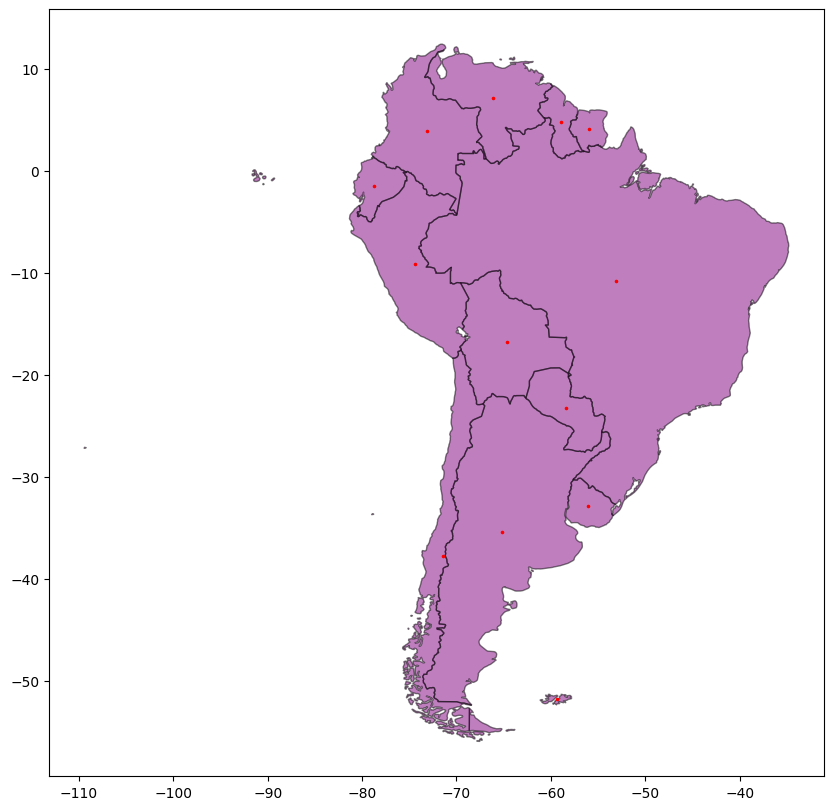

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'aspect':1})
gdf['geometry'].plot(ax=ax, color='purple', edgecolor='black', alpha=0.5)
gdf['centroide'].plot(ax=ax, color='red', marker='.', markersize=10)
plt.show()

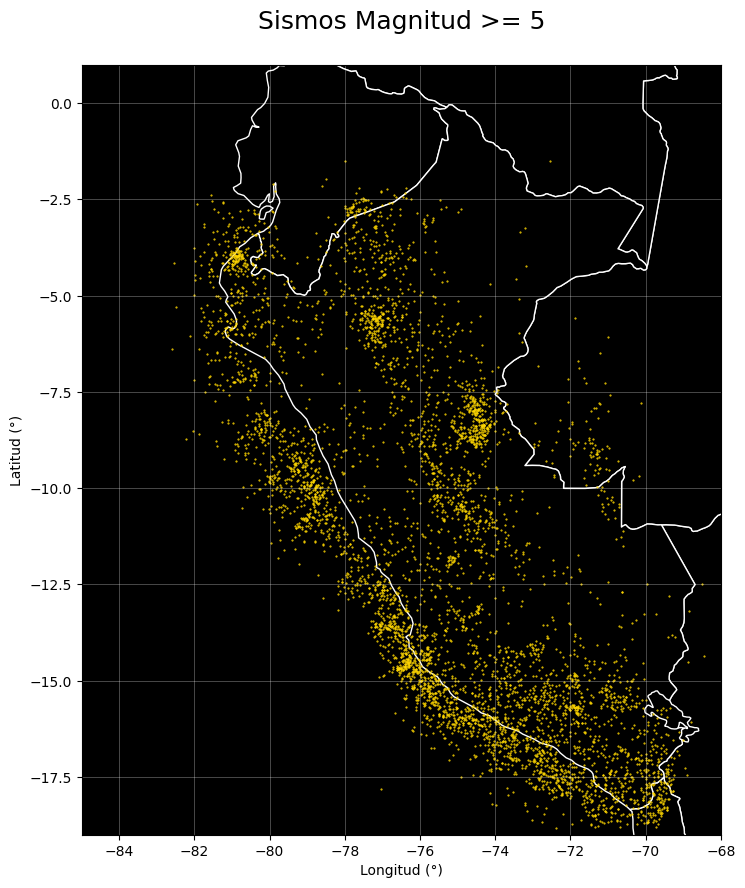

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color='black', edgecolor='white', alpha=1)
gdf_sismos_5.plot(ax=ax, color='gold', marker='.', markersize=1)
ax.set_facecolor('black')

ax.set_title('Sismos Magnitud >= 5\n', color='black', fontsize=18)
ax.set_xlabel('Longitud (°)', color='black')
ax.set_ylabel('Latitud (°)', color='black')

ax.grid(True, color='white', alpha=0.4, lw=0.5)

ax.set_xlim(-85, -68)
ax.set_ylim(-19, 1)

plt.show()


In [ ]:
gdf_sismos_5.to_file('drive/MyDrive/db/sismos')


<table border=1 width='99%'>
<tr>
<td bgcolor='#008000'>

# **<font color="#FFC901">Plotly</font>**

</td>
</tr>
</table>

**Plotly** es una biblioteca de visualización de datos en Python que permite crear gráficos interactivos y visualizaciones dinámicas de alta calidad.

Es especialmente popular para el análisis de datos y la creación de dashboards.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> Características</font>**

</td>
</tr>
</table>

>* **Visualizaciones Interactivas**:
  * Los gráficos generados son interactivos, lo que permite a los usuarios acercar, alejar y explorar datos de manera más efectiva.
>* **Variedad de Gráficos**:
  * Soporta una amplia gama de tipos de gráficos, incluyendo:
    * Gráficos de líneas
    * Gráficos de dispersión (scatter plots)
    * Gráficos de barras
    * Gráficos de pastel (pie charts)
    * Mapas (choropleth, scatter maps)
    * Gráficos 3D
    * Y más.
>* **Integración con Dash**:
  * Plotly se integra fácilmente con Dash, un framework para construir aplicaciones web interactivas en Python.
>* **Exportación**:
  * Los gráficos se pueden exportar a diferentes formatos, como PNG, JPEG y PDF.
>* **Compatibilidad**:
  * Funciona en Jupyter Notebooks, scripts de Python y aplicaciones web.
>* **Temas y Estilos**:
  * Permite personalizar los estilos y temas de los gráficos para adaptarse a las necesidades del usuario.

In [ ]:
def profundidad_categoria(profundidad):
  if profundidad < 50:
    return 'Menor 50 km'
  elif profundidad < 100:
    return 'Entre 50 y 100 km'
  elif profundidad <= 150:
    return 'Entre 100 y 150 km'
  elif profundidad <= 200:
    return 'Entre 150 y 200 km'
  else:
    return 'Mayor a 200 km'

In [ ]:
lat_lng_lima = [-12.04318, -77.02824]
from geopy.distance import geodesic

df_lima = df[df[['Latitud', 'Longitud']].apply(lambda punto: True if geodesic(lat_lng_lima, punto).km <=200 else False, axis=1 )].copy()
df_lima.reset_index(drop=True, inplace=True)

lat_lng_vegueta = [-11.02253, -77.64378]
lat_lng_huaura = [-11.07, -77.59944]
lat_lng_huacho = [-11.10667, -77.605]
lat_lng_chancay = [-11.57139, -77.26722]
lat_lng_ancon = [-11.69655375, -77.1116547476923]
lat_lng_lima = [-12.04318, -77.02824]
lat_lng_lurin = [-12.2736, -76.8694]
lat_lng_pucusana = [-12.4817, -76.7975]
lat_lng_mala = [-12.65806, -76.63083]
lat_lng_cañete = [-13.07556, -76.38528]

punto = [lat_lng_vegueta, lat_lng_huacho, lat_lng_chancay, lat_lng_ancon, lat_lng_lima, lat_lng_lurin, lat_lng_pucusana, lat_lng_mala, lat_lng_cañete]
lugar = ['Vegueta', 'Huacho', 'Chancay', 'Ancón', 'Lima', 'Lurin', 'Pucusana', 'Mala', 'Cañete']

diccionario_lugares = dict(zip(lugar, punto))

df_lima['Año'] = df_lima['Fecha'].dt.year

df_sismos_x_año = df_lima.groupby('Año').size().reset_index(name='Cantidad de Sismos')

df_lima['MesNum'] = df_lima['Fecha'].dt.month
df_lima['Mes'] = df_lima['Fecha'].dt.month_name()
df_sismos_x_mes = df_lima.groupby(['MesNum', 'Mes']).size().reset_index(name='Cantidad')

def profundidad_color(profundidad):
  if profundidad <= 50:
    return 'red'
  elif profundidad <= 100:
    return 'green'
  elif profundidad <= 150:
    return 'gold'
  elif profundidad <= 200:
    return 'blue'
  else:
    return 'black'

df_lima['profundidad_color'] = df_lima['Profundidad'].apply(profundidad_color).copy()
df_lima.head()




,Fecha,Latitud,Longitud,Profundidad,Magnitud,geometry,Año,MesNum,Mes,profundidad_color
0,1961-01-28,-13.6,-76.3,86,6.0,POINT (-76.3 -13.6),1961,1,January,green
1,1961-06-17,-12.0,-75.3,29,5.5,POINT (-75.3 -12),1961,6,June,red
2,1962-09-28,-13.8,-76.7,61,4.8,POINT (-76.7 -13.8),1962,9,September,green
3,1963-04-28,-11.7,-78.1,10,5.3,POINT (-78.1 -11.7),1963,4,April,red
4,1963-06-27,-11.7,-77.6,33,4.7,POINT (-77.6 -11.7),1963,6,June,red


In [ ]:
df_lima['Categoría'] = df_lima['Profundidad'].apply(profundidad_categoria)
df_lima.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud,geometry,Año,MesNum,Mes,profundidad_color,Categoría
0,1961-01-28,-13.6,-76.3,86,6.0,POINT (-76.3 -13.6),1961,1,January,green,Entre 50 y 100 km
1,1961-06-17,-12.0,-75.3,29,5.5,POINT (-75.3 -12),1961,6,June,red,Menor 50 km
2,1962-09-28,-13.8,-76.7,61,4.8,POINT (-76.7 -13.8),1962,9,September,green,Entre 50 y 100 km
3,1963-04-28,-11.7,-78.1,10,5.3,POINT (-78.1 -11.7),1963,4,April,red,Menor 50 km
4,1963-06-27,-11.7,-77.6,33,4.7,POINT (-77.6 -11.7),1963,6,June,red,Menor 50 km


In [ ]:
import plotly.express as px

fig = px.scatter_3d(data_frame=df_lima, x=df_lima['Longitud'], y=df_lima['Latitud'], z=df_lima['Profundidad']*-1, color=df_lima['Categoría'])

fig.update_layout(
    title='Sismos en Lima',
    legend = dict(
        title='Profundidad (km)',
        x=0,
        y=1.0,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='Black'
        ),
        bgcolor='white',
        bordercolor='Black',
        borderwidth=2,
        itemsizing='constant'
    ),
    width=750,
    height=500,

    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
        ),
    paper_bgcolor="rgb(23,23,23)",
    plot_bgcolor="rgb(23,23,23)",
    scene=dict(
        xaxis=dict(
            title='Longitud',
            titlefont=dict(
                color='white'
            ),
        ),
        yaxis=dict(
            title='Latitud',
            titlefont=dict(
                color='white'
            ),
        ),
        zaxis=dict(
            title='Profundidad',
            titlefont=dict(
                color='white'
            ),
        ),
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=1)

    )
)

fig.update_traces(marker={'size':1})
fig.show()